# Sistema de Previsão de Comportamento do Cliente

## **Visão Geral do Projeto**

Este projeto tem como objetivo desenvolver um sistema robusto para prever o comportamento do cliente, como padrões de compra e tendências de vendas futuras, utilizando técnicas de aprendizado de máquina. As percepções geradas por este modelo podem ser aproveitadas para aprimorar decisões de negócios, otimizar estratégias de marketing e melhorar a satisfação geral do cliente.

## **Objetivos**

- Construir um modelo preditivo para prever comportamentos do cliente, como frequência de compra, valor do pedido e produtos preferidos.
- Utilizar técnicas avançadas de aprendizado de máquina para analisar dados do cliente.
- Implantar o modelo mais preciso para facilitar previsões em tempo real.

## **Fluxo do Processo**

### 1. **Coleta e Exploração de Dados**
Utilizamos vários conjuntos de dados, cada um contendo informações cruciais sobre clientes, pedidos, pagamentos, avaliações, produtos, vendedores e dados de geolocalização. Esses dados diversos são fundamentais para compreender os vários fatores que influenciam o comportamento do cliente.

### 2. **Pré-processamento de Dados**
Para garantir dados limpos e utilizáveis, foram implementadas as seguintes etapas de pré-processamento:
- Tratamento de valores ausentes usando técnicas de imputação.
- Normalização e padronização de características numéricas.
- Codificação de características categóricas.
- Divisão dos dados em conjuntos de treinamento, validação e teste para treinamento e avaliação do modelo.

### 3. **Engenharia de Características**
Criamos novas características baseadas na lógica de negócios para enriquecer o conjunto de dados e melhorar a precisão do modelo. Este processo envolveu a modificação de características existentes e a geração de novas para capturar padrões mais sutis no comportamento do cliente.

### 4. **Seleção e Treinamento do Modelo**
Múltiplos algoritmos de aprendizado de máquina e aprendizado profundo foram aplicados para treinar modelos preditivos. Os modelos foram avaliados com base em métricas de desempenho para identificar a melhor abordagem.

### 5. **Avaliação do Modelo**
Após o treinamento, cada modelo foi avaliado usando várias métricas de avaliação, como acurácia, precisão, recall e pontuação F1. O modelo com melhor desempenho foi selecionado para implantação.

## **Resumo dos Dados**

O projeto se baseia nos seguintes conjuntos de dados:

1. **Dataset de Clientes:** Contém informações demográficas sobre os clientes.
2. **Dataset de Geolocalização:** Fornece detalhes geográficos baseados no CEP.
3. **Dataset de Itens de Pedido:** Inclui detalhes a nível de item para cada pedido.
4. **Dataset de Pagamentos de Pedido:** Registra informações de pagamento para pedidos.
5. **Dataset de Avaliações de Pedido:** Contém avaliações e classificações dos clientes.
6. **Dataset de Pedidos:** Acompanha o ciclo de vida do pedido, da compra à entrega.
7. **Dataset de Produtos:** Descreve os produtos vendidos na plataforma.
8. **Dataset de Vendedores:** Armazena informações sobre os vendedores de produtos.
9. **Dataset de Tradução de Nome de Categoria de Produto:** Traduz nomes de categorias de produtos para o inglês.

Cada conjunto de dados desempenha um papel vital no enriquecimento da análise geral e na melhoria do poder preditivo do modelo.

---

Este notebook documentará cada etapa do projeto, incluindo pré-processamento de dados, engenharia de características, construção e avaliação do modelo, para garantir um fluxo de trabalho transparente e replicável.



## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Coleta e Exploração de Dados

In [ ]:
customers_df = pd.read_csv('/content/drive/MyDrive/DATASETS/Sprint 3/olist_customers_dataset.csv')
geolocation_df = pd.read_csv('/content/drive/MyDrive/DATASETS/Sprint 3/olist_geolocation_dataset.csv')
order_items_df = pd.read_csv('/content/drive/MyDrive/DATASETS/Sprint 3/olist_order_items_dataset.csv')
order_payments_df = pd.read_csv('/content/drive/MyDrive/DATASETS/Sprint 3/olist_order_payments_dataset.csv')
order_reviews_df = pd.read_csv('/content/drive/MyDrive/DATASETS/Sprint 3/olist_order_reviews_dataset.csv')
orders_df = pd.read_csv('/content/drive/MyDrive/DATASETS/Sprint 3/olist_orders_dataset.csv')
products_df = pd.read_csv('/content/drive/MyDrive/DATASETS/Sprint 3/olist_products_dataset.csv')
sellers_df = pd.read_csv('/content/drive/MyDrive/DATASETS/Sprint 3/olist_sellers_dataset.csv')
category_translation_df = pd.read_csv('/content/drive/MyDrive/DATASETS/Sprint 3/product_category_name_translation.csv')

### Carregamos todos os datasets necessários para nossa análise.
#### Cada dataset contém informações específicas que serão úteis para entender o comportamento do cliente e as tendências de vendas.

In [ ]:
print('Dataset de Clientes')
print(customers_df.head(), '\n')

print('Dataset de Geolocalização')
print(geolocation_df.head(), '\n')

print('Dataset de Itens de Pedido')
print(order_items_df.head(), '\n')

print('Dataset de Pagamentos de Pedido')
print(order_payments_df.head(), '\n')

print('Dataset de Avaliações de Pedido')
print(order_reviews_df.head(), '\n')

print('Dataset de Pedidos')
print(orders_df.head(), '\n')

print('Dataset de Produtos')
print(products_df.head(), '\n')

print('Dataset de Vendedores')
print(sellers_df.head(), '\n')

print('Dataset de Tradução de Nome de Categoria de Produto')
print(category_translation_df.head(), '\n')

Customers Dataset
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP   

Geolocation Dataset
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.5456

### Visualizamos as primeiras linhas de cada dataset para ter uma ideia
- inicial da estrutura e conteúdo dos dados. Isso nos ajuda a entender quais
-  informações estão disponíveis em cada conjunto de dados.

## Pré-processamento de Dados

### Combinamos todos os datasets em um único DataFrame.
- Isso nos permite ter uma visão holística dos dados, relacionando
-  informações de pedidos, clientes, produtos e vendedores.

In [ ]:
# Merging datasets based on key columns to create a single DataFrame
df = orders_df.merge(order_items_df, on='order_id', how='left')
df = df.merge(order_payments_df, on='order_id', how='left')
df = df.merge(order_reviews_df, on='order_id', how='left')
df = df.merge(products_df, on='product_id', how='left')
df = df.merge(category_translation_df, on='product_category_name', how='left')
df = df.merge(customers_df, on='customer_id', how='left')
df = df.merge(sellers_df, on='seller_id', how='left')

### Verificamos a quantidade de valores nulos em cada coluna.
- Isso é importante para entender quais colunas precisam de tratamento
- antes de prosseguirmos com a análise e modelagem.


In [ ]:
df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,177
order_delivered_carrier_date,2086
order_delivered_customer_date,3421
order_estimated_delivery_date,0
order_item_id,833
product_id,833


Para decidir se devemos remover ou preencher valores ausentes, precisamos entender a porcentagem de valores ausentes para cada característica e ver se a imputação de valores ausentes faz sentido com base na natureza dos dados.

### Implementamos uma estratégia de limpeza de dados que trata
- valores ausentes de forma diferente dependendo da porcentagem de ausência.
- Isso nos ajuda a manter o máximo de informações possível enquanto garantimos que nossos dados estejam prontos para análise e modelagem.

In [ ]:
# Função para calcular porcentagem de valores nulos em cada coluna
def calculate_missing_values_percentage(df):
    missing_values = df.isnull().sum()
    total_values = len(df)
    missing_percentage = (missing_values / total_values) * 100
    return missing_percentage

# Limites para decidir a estratégia de imputação
low_threshold = 5  # Menos de 5% de valores ausentes serão preenchidos
high_threshold = 40  # Entre 5% e 40% serão tratados caso a caso

# Função para imputar ou remover valores ausentes
def clean_missing_values(df, low_threshold=5, high_threshold=40):
    missing_percentage = df.isnull().mean() * 100

    # Imputar colunas com baixa porcentagem de valores ausentes
    median_imputation_columns = missing_percentage[
        (missing_percentage > 0) & (missing_percentage <= low_threshold)
    ].index

    df_imputed = df.copy()
    for column in median_imputation_columns:
        if df_imputed[column].dtype == 'object':
            # Imputar colunas categóricas com o valor mais frequente
            df_imputed[column].fillna(df_imputed[column].mode()[0], inplace=True)
        else:
            # Imputar colunas numéricas com a mediana
            df_imputed[column].fillna(df_imputed[column].median(), inplace=True)

    # Colunas restantes com percentagem média de valores ausentes
    remaining_columns = missing_percentage[
        (missing_percentage > low_threshold) & (missing_percentage <= high_threshold)
    ].index

    # Aplicar imputações adicionais ou remover colunas restantes
    # (Poderíamos adotar uma lógica específica do domínio ou negócio)
    df_final = df_imputed.drop(columns=remaining_columns)

    return df_final

# Limpando o DataFrame mesclado
df_cleaned = clean_missing_values(df)

# Verificar a forma (shape) do DataFrame limpo
print(df_cleaned.shape)

(119143, 40)


## EDA (Análise Exploratória dos Dados)

### Este gráfico mostra as 10 categorias de produtos mais frequentes.
- Podemos observar que 'cama_mesa_banho' (cama, mesa e banho) é a categoria mais comum,
- seguida por 'beleza_saude' (beleza e saúde) e 'esporte_lazer' (esporte e lazer).
- Essa informação é valiosa para entender quais tipos de produtos são mais populares na plataforma, o que pode influenciar estratégias de marketing e estoque.


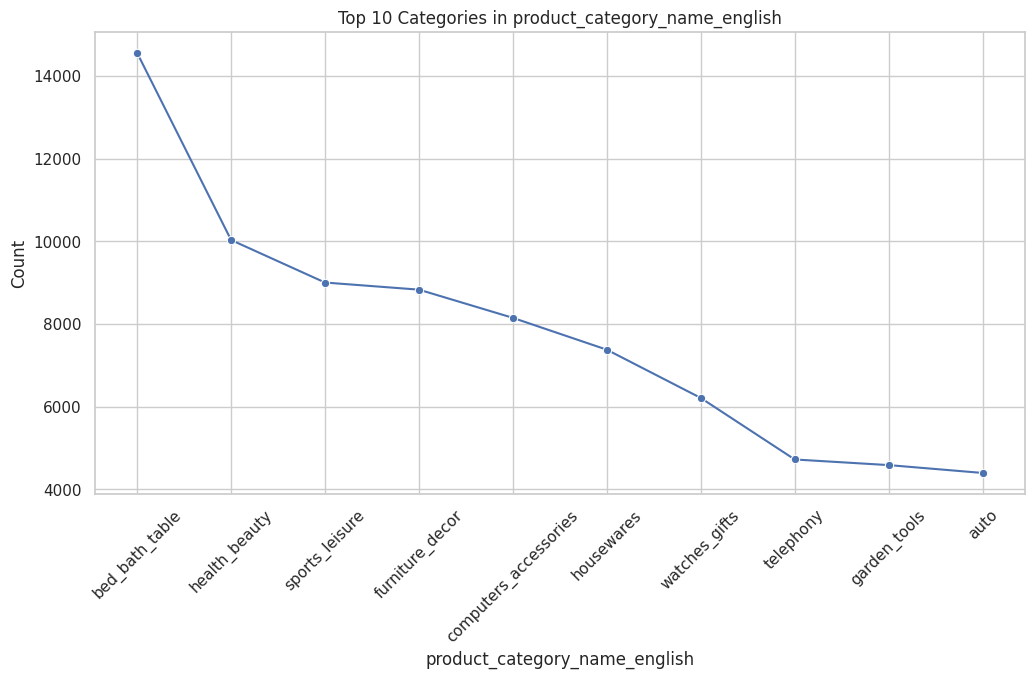

In [ ]:
def plot_top_10_categorical_distribution(df, column_name):
    # Conta as ocorrências da coluna categórica e seleciona as 10 mais frequentes
    top_10 = df[column_name].value_counts().nlargest(10)

    # Cria a figura e o line plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=top_10.index, y=top_10.values, marker="o")

    # Configurações do gráfico
    plt.title(f'Top 10 Categories in {column_name}')
    plt.ylabel('Count')
    plt.xlabel(column_name)
    plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização
    plt.grid(True)  # Adiciona uma grade para facilitar a leitura dos valores
    plt.show()

# Chamando a função para a coluna 'product_category_name_english'
plot_top_10_categorical_distribution(df_cleaned, 'product_category_name_english')

###  Este gráfico de dispersão mostra a relação entre o preço do produto e o valor do frete.
- Podemos observar que há uma tendência de aumento no valor do frete conforme o preço do produto aumenta, mas a relação não é perfeitamente linear.
- Há muitos pontos concentrados em valores mais baixos, sugerindo que a maioria das vendas são de produtos de menor valor com fretes relativamente baixos.

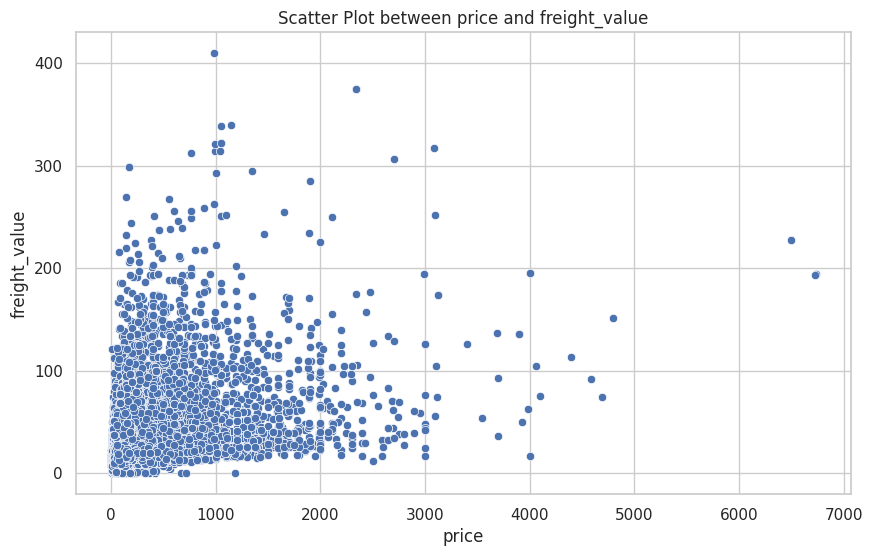

In [ ]:
# 3. Relações Entre Variáveis
def plot_scatter(df, column_x, column_y):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[column_x], y=df[column_y])
    plt.title(f'Scatter Plot between {column_x} and {column_y}')
    plt.show()

# Plot de exemplo entre 'price' e 'freight_value'
plot_scatter(df_cleaned, 'price', 'freight_value')


### Este gráfico mostra a distribuição dos pedidos por status.
- Podemos ver que a maioria dos pedidos está no status 'delivered' (entregue), o que é um bom sinal para o negócio. Há relativamente poucos pedidos nos outros status, como 'canceled' (cancelado) ou 'unavailable' (indisponível).

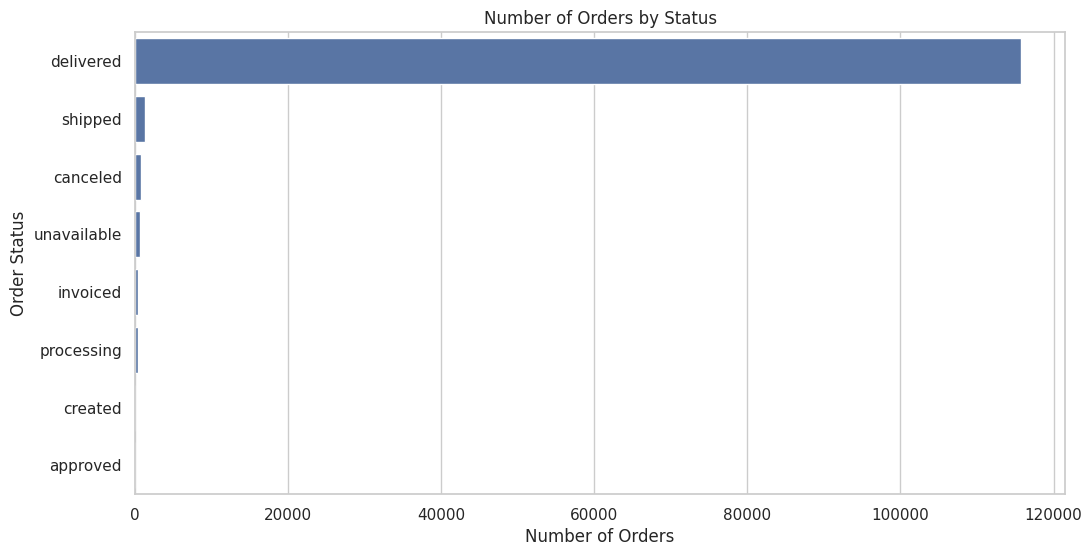

In [ ]:
# Configuração geral de visualização
sns.set(style="whitegrid")

# Criando o gráfico de barras para contar o número de pedidos por status
plt.figure(figsize=(12, 6))
sns.countplot(y=df_cleaned['order_status'], order=df_cleaned['order_status'].value_counts().index)
plt.title('Number of Orders by Status')
plt.xlabel('Number of Orders')
plt.ylabel('Order Status')
plt.show()

### Engenharia de Características (Feature Engineering)

### Criamos novas características baseadas na data e hora da compra.
- Isso nos permite analisar padrões de compra em diferentes períodos do dia, dias da semana e meses do ano.


In [ ]:
# Convertendo o campo de data para datetime
df_cleaned['order_purchase_timestamp'] = pd.to_datetime(df_cleaned['order_purchase_timestamp'])

# Extrair informações adicionais de datas e horários para análises
df_cleaned['order_date'] = df_cleaned['order_purchase_timestamp'].dt.date
df_cleaned['order_year_month'] = df_cleaned['order_purchase_timestamp'].dt.to_period('M')
df_cleaned['order_day_of_week'] = df_cleaned['order_purchase_timestamp'].dt.day_name()
df_cleaned['order_hour'] = df_cleaned['order_purchase_timestamp'].dt.hour

# Classificando períodos do dia
def categorize_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Dawn'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

df_cleaned['time_of_day'] = df_cleaned['order_hour'].apply(categorize_time_of_day)



### Este gráfico mostra a evolução do número de pedidos ao longo do tempo.
- Podemos observar uma tendência geral de crescimento, com alguns picos sazonais.
- Isso indica que o e-commerce brasileiro está em expansão, com possíveis aumentos durante períodos de compras específicos (como Black Friday ou Natal).

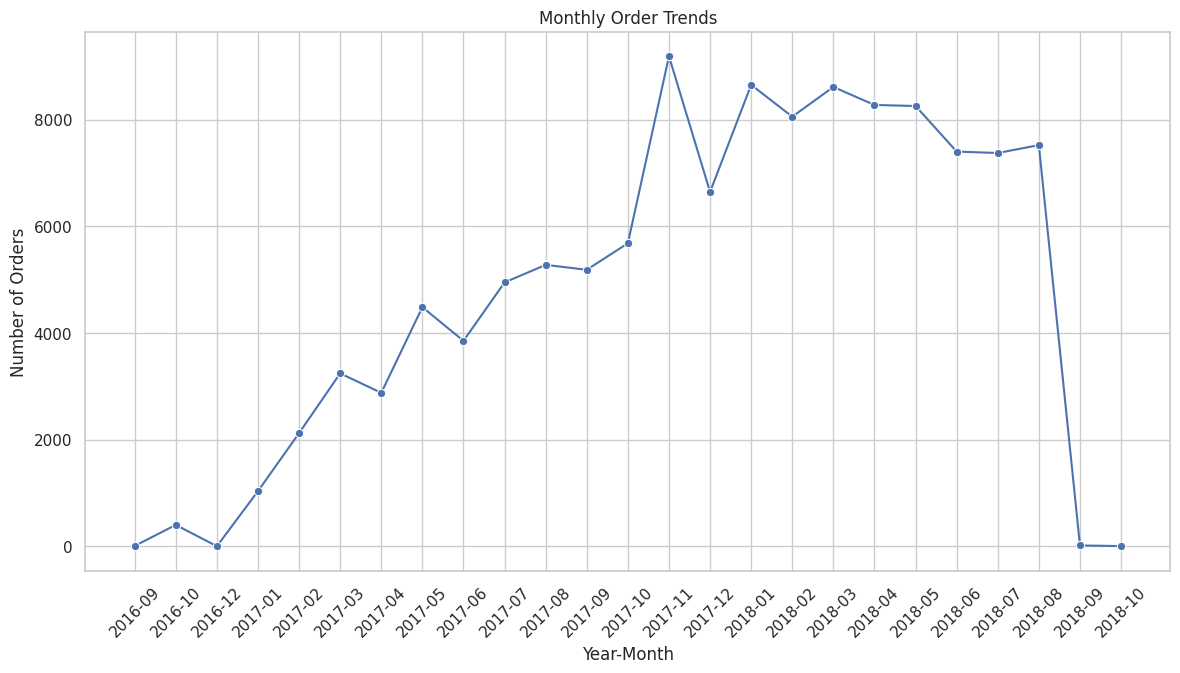

In [ ]:
# 1. Tendências Crescentes no E-commerce Brasileiro
plt.figure(figsize=(14, 7))
monthly_orders = df_cleaned.groupby('order_year_month')['order_id'].count().reset_index()
monthly_orders['order_year_month'] = monthly_orders['order_year_month'].astype(str)  # Convertendo para string
sns.lineplot(data=monthly_orders, x='order_year_month', y='order_id', marker='o')
plt.title('Monthly Order Trends')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


### Este gráfico mostra a distribuição de pedidos por dia da semana.
- Interessantemente, parece haver uma distribuição relativamente uniforme ao longo da semana, com uma leve preferência por compras durante os dias úteis.
- Isso pode indicar que muitos consumidores fazem compras durante seu horário de trabalho.

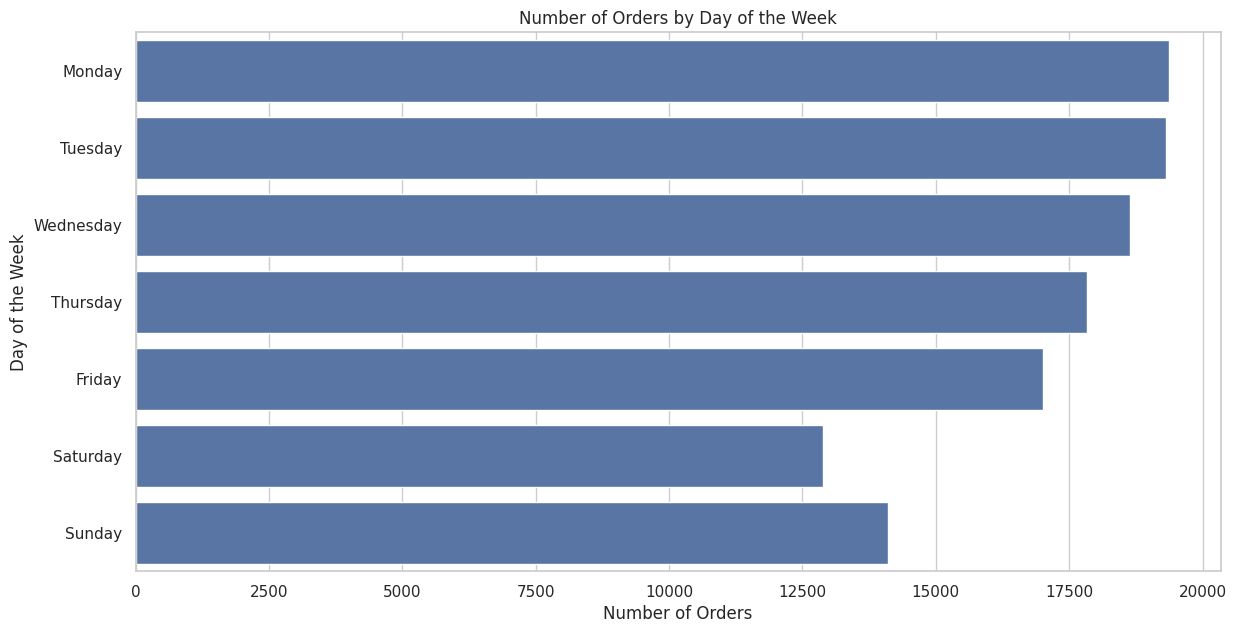

In [ ]:
# 2. Dias da Semana Preferenciais para Compras Online
plt.figure(figsize=(14, 7))
weekly_orders = df_cleaned['order_day_of_week'].value_counts().reset_index()
weekly_orders.columns = ['order_day_of_week', 'order_count']
sns.barplot(data=weekly_orders, x='order_count', y='order_day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Number of Orders')
plt.ylabel('Day of the Week')
plt.show()

### Este gráfico revela os períodos do dia mais populares para compras online.
- Podemos ver que a tarde e a noite são os períodos mais ativos, o que faz sentido considerando que muitas pessoas fazem compras após o trabalho ou durante seu tempo livre.
- A madrugada, como esperado, tem o menor número de pedidos.

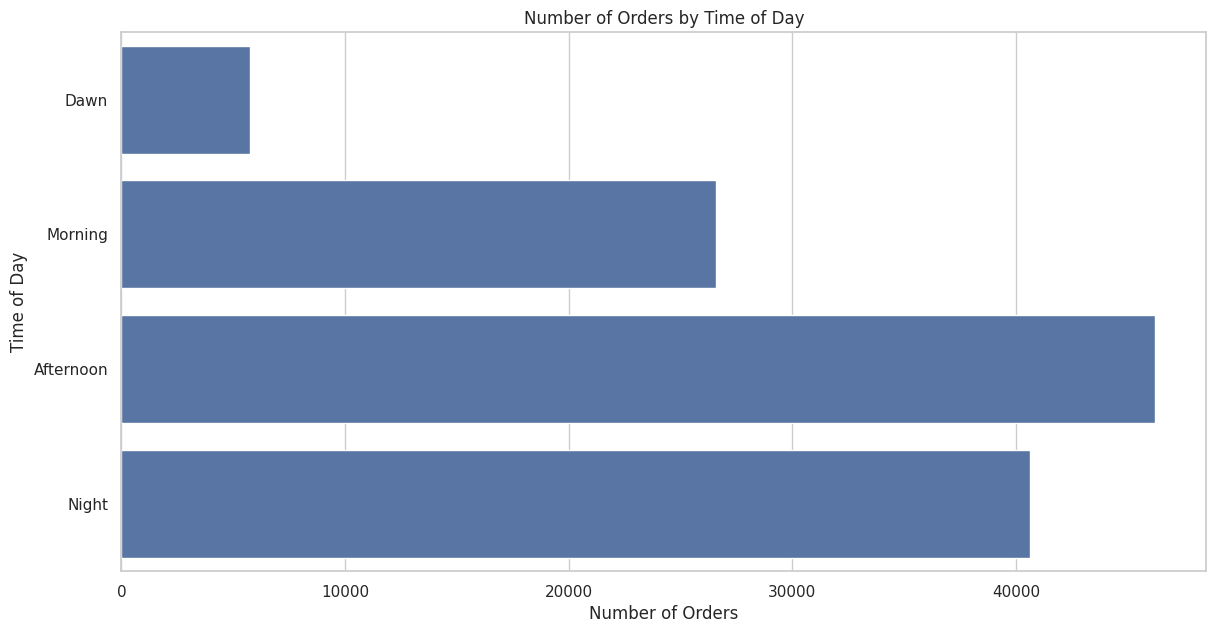

In [ ]:
# 3. Períodos do Dia em que os Clientes Tendem a Comprar
plt.figure(figsize=(14, 7))
time_of_day_orders = df_cleaned['time_of_day'].value_counts().reset_index()
time_of_day_orders.columns = ['time_of_day', 'order_count']
sns.barplot(data=time_of_day_orders, x='order_count', y='time_of_day', order=['Dawn', 'Morning', 'Afternoon', 'Night'])
plt.title('Number of Orders by Time of Day')
plt.xlabel('Number of Orders')
plt.ylabel('Time of Day')
plt.show()

In [ ]:
# Convertendo o campo de data para datetime
df_cleaned['order_purchase_timestamp'] = pd.to_datetime(df_cleaned['order_purchase_timestamp'])

# Extrair informações adicionais de datas e horários para análises
df_cleaned['order_date'] = df_cleaned['order_purchase_timestamp'].dt.date
df_cleaned['order_year_month'] = df_cleaned['order_purchase_timestamp'].dt.to_period('M')
df_cleaned['order_year'] = df_cleaned['order_purchase_timestamp'].dt.year
df_cleaned['order_month'] = df_cleaned['order_purchase_timestamp'].dt.month


### Este gráfico compara o número de pedidos mensais entre 2017 e 2018.
- Podemos observar um crescimento significativo em 2018 em comparação com 2017, especialmente nos últimos meses do ano. Isso pode indicar um aumento na popularidade da plataforma de e-commerce e possivelmente o impacto de eventos de compras como a Black Friday em novembro.

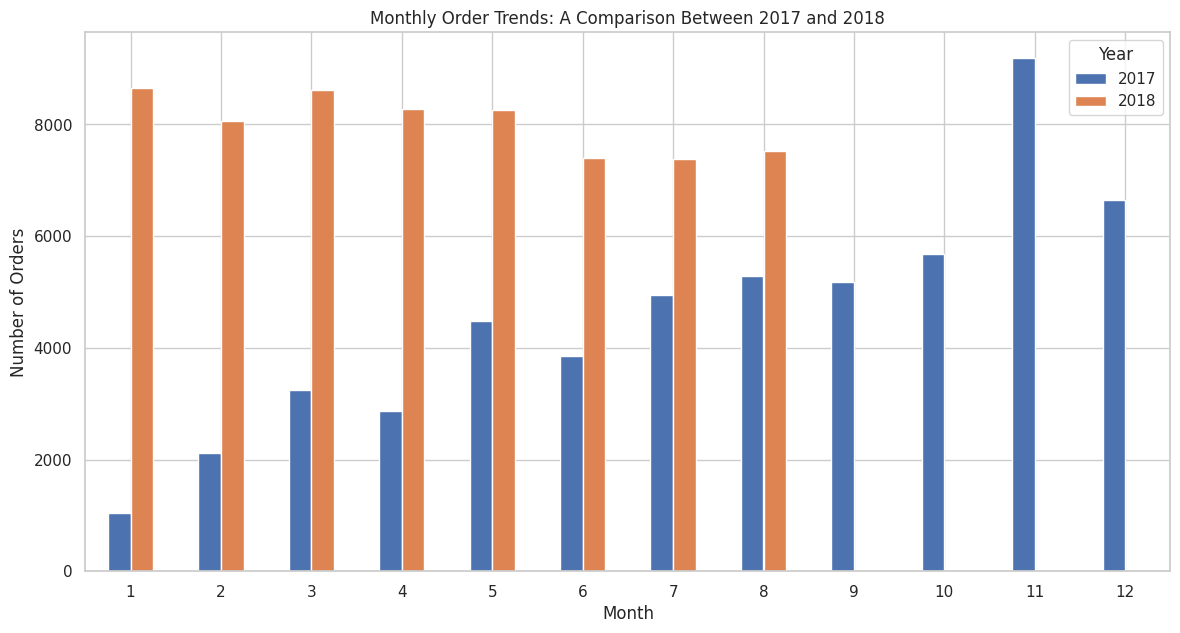

In [ ]:
# Filtrar dados para os anos de 2017 e 2018
df_2017_2018 = df_cleaned[df_cleaned['order_year'].isin([2017, 2018])]

# Agrupar dados por ano e mês
monthly_orders = df_2017_2018.groupby(['order_year', 'order_month'])['order_id'].count().reset_index()

# Pivotar os dados para facilitar o plot
monthly_orders_pivot = monthly_orders.pivot(index='order_month', columns='order_year', values='order_id').fillna(0)
monthly_orders_pivot.columns = ['2017', '2018']

# Criar o gráfico de barras agrupadas
monthly_orders_pivot.plot(kind='bar', figsize=(14, 7))
plt.title('Monthly Order Trends: A Comparison Between 2017 and 2018')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.show()

In [ ]:
import requests

# Endpoints da API IBGE
states_url = 'https://servicodados.ibge.gov.br/api/v1/localidades/estados'

# Função para obter os dados da API
def get_states_and_regions():
    states_data = requests.get(states_url).json()
    state_to_region = {state['sigla']: state['regiao']['nome'] for state in states_data}
    return state_to_region

# Obter os dados de estados e suas regiões
state_to_region = get_states_and_regions()

# Adicionar a região ao DataFrame
df_cleaned['customer_region'] = df_cleaned['customer_state'].map(state_to_region)

# Verificar se a região foi adicionada corretamente
print(df_cleaned[['customer_state', 'customer_region']].drop_duplicates().sort_values('customer_state'))

# Aqui estamos enriquecendo nossos dados adicionando informações
# sobre a região de cada estado. Isso nos permitirá fazer análises regionais
# mais detalhadas.

     customer_state customer_region
925              AC           Norte
750              AL        Nordeste
1160             AM           Norte
246              AP           Norte
3                BA        Nordeste
43               CE        Nordeste
49               DF    Centro-Oeste
230              ES         Sudeste
4                GO    Centro-Oeste
459              MA        Nordeste
16               MG         Sudeste
267              MS    Centro-Oeste
93               MT    Centro-Oeste
177              PA           Norte
104              PB        Nordeste
38               PE        Nordeste
541              PI        Nordeste
7                PR             Sul
9                RJ         Sudeste
5                RN        Nordeste
197              RO           Norte
36               RR           Norte
8                RS             Sul
21               SC             Sul
65               SE        Nordeste
0                SP         Sudeste
42               TO         

### Este gráfico mostra a evolução do número de pedidos por região ao longo do tempo.
- Podemos observar que a região Sudeste lidera consistentemente em número de pedidos, seguida pelas regiões Sul e Nordeste. Isso reflete a distribuição populacional e econômica do Brasil, com o Sudeste sendo a região mais populosa e economicamente ativa.

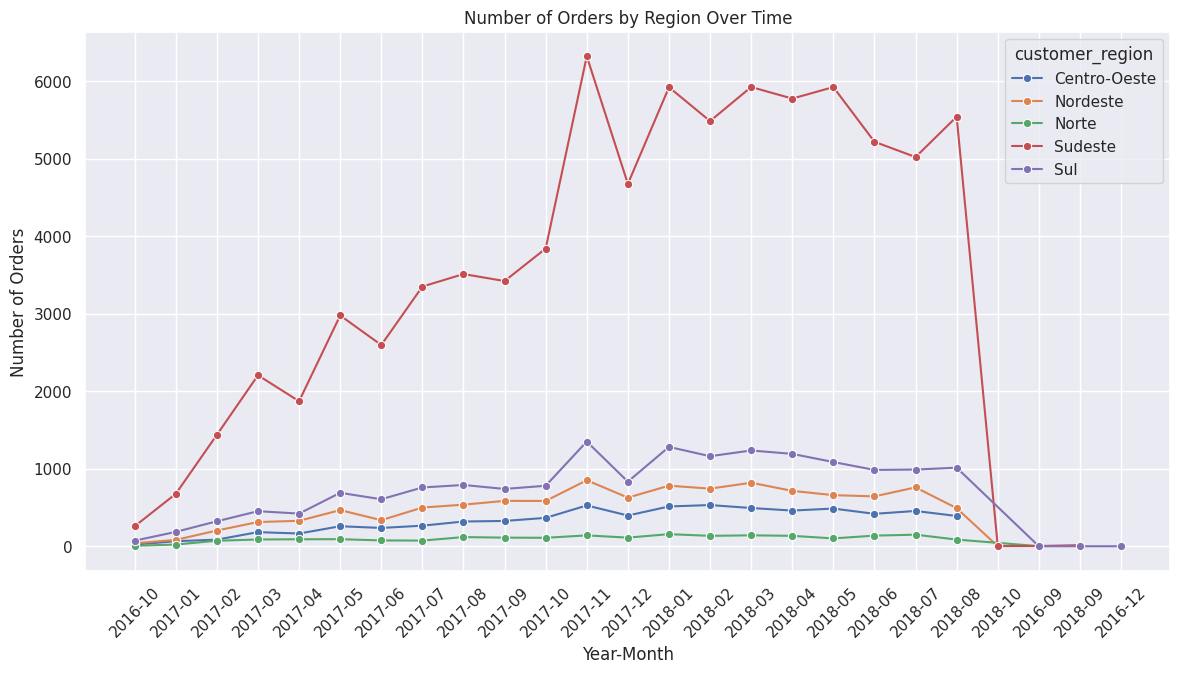

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configure o estilo do tema
sns.set_theme(style="darkgrid")

# Agregar o número de pedidos por região e ano-mês
region_monthly_orders = df_cleaned.groupby(['customer_region', 'order_year_month'])['order_id'].count().reset_index()
region_monthly_orders['order_year_month'] = region_monthly_orders['order_year_month'].astype(str)

# Plotar o número de pedidos por região ao longo do tempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=region_monthly_orders, x="order_year_month", y="order_id", hue="customer_region", marker='o')
plt.title('Number of Orders by Region Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

### Este gráfico de barras horizontais mostra o número e a porcentagem de pedidos por estado.
- São Paulo (SP) lidera com uma margem significativa, seguido por Rio de Janeiro (RJ) e Minas Gerais (MG).
- Isso reforça a dominância da região Sudeste no e-commerce brasileiro, possivelmente devido à maior população e desenvolvimento econômico dessa região.

<ipython-input-29-c94344dc1a15>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=state_orders, y='customer_state', x='order_count', palette=palette, orient='h')


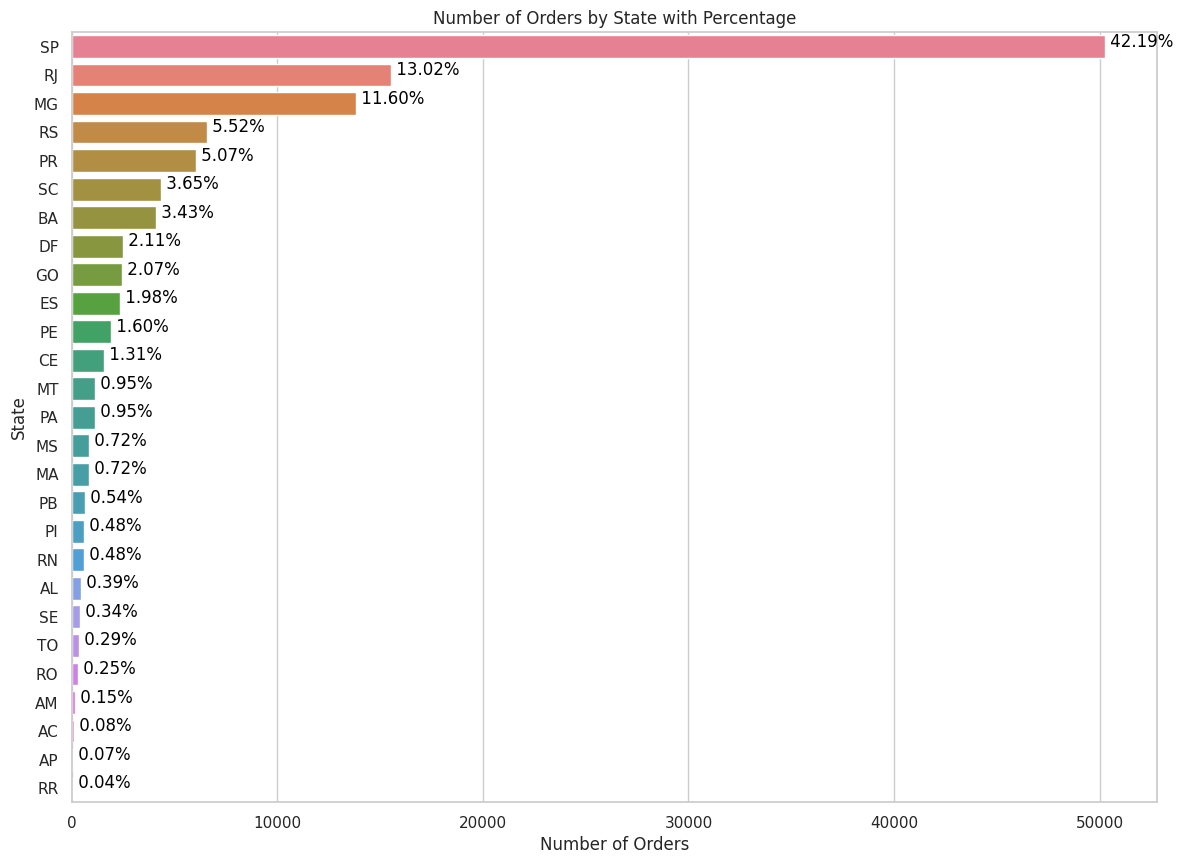

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração geral de visualização
sns.set_theme(style="whitegrid")

# Agregar o número de pedidos por estado
state_orders = df_cleaned['customer_state'].value_counts().reset_index()
state_orders.columns = ['customer_state', 'order_count']

# Calcular a porcentagem de pedidos para cada estado
total_orders = state_orders['order_count'].sum()
state_orders['percentage'] = (state_orders['order_count'] / total_orders) * 100

# Criar uma paleta de cores
palette = sns.color_palette("husl", len(state_orders))

# Criar o gráfico de barras horizontal
plt.figure(figsize=(14, 10))
bars = sns.barplot(data=state_orders, y='customer_state', x='order_count', palette=palette, orient='h')

# Adicionar percentagens às barras
for index, row in state_orders.iterrows():
    bars.text(row.order_count, index, f' {row.percentage:.2f}%', color='black', ha="left")

# Adicionar título e rótulos
plt.title('Number of Orders by State with Percentage')
plt.xlabel('Number of Orders')
plt.ylabel('State')

# Exibir o gráfico
plt.show()

### No gráfico de pizza mostra a distribuição dos tipos de pagamento.
- O cartão de crédito é claramente o método de pagamento mais popular, seguido pelo boleto.
- Isso sugere uma preferência por métodos de pagamento que oferecem conveniência (cartão de crédito) ou flexibilidade de pagamento (boleto).

### O gráfico de linha mostra a evolução dos tipos de pagamento ao longo do tempo.
- Podemos observar que o cartão de crédito mantém uma liderança consistente e crescente.
- O boleto bancário também mostra um crescimento, embora menos acentuado.
- Isso pode indicar uma crescente confiança dos consumidores em métodos de pagamento online.

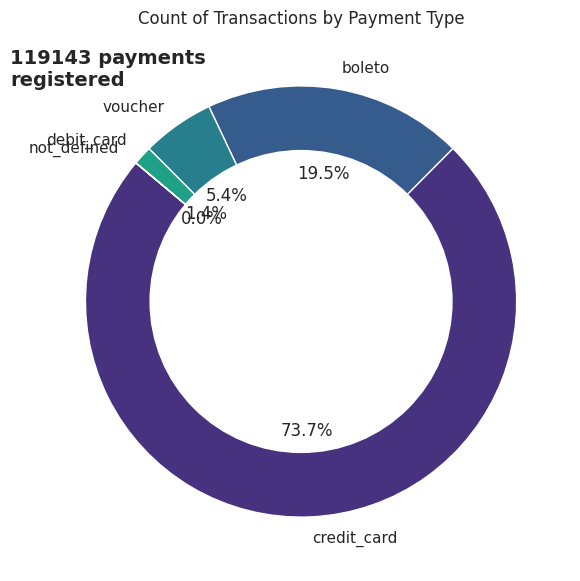

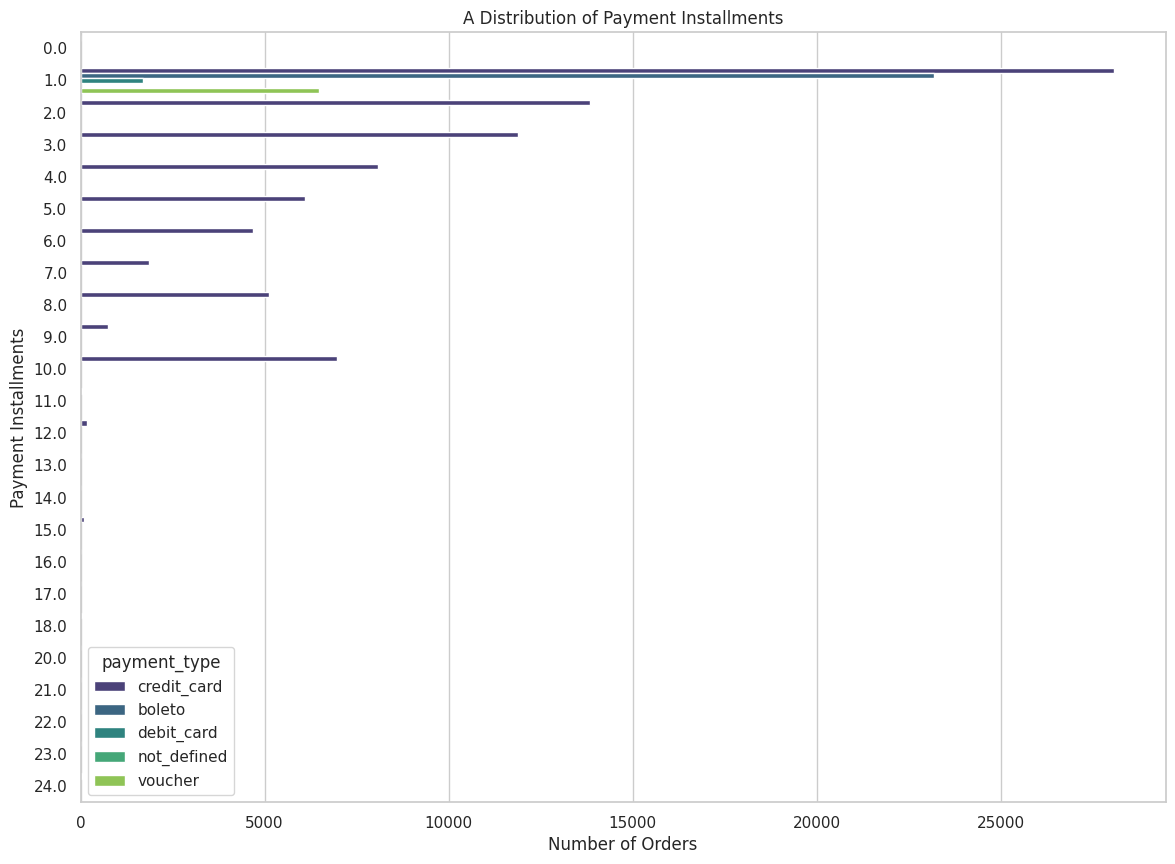

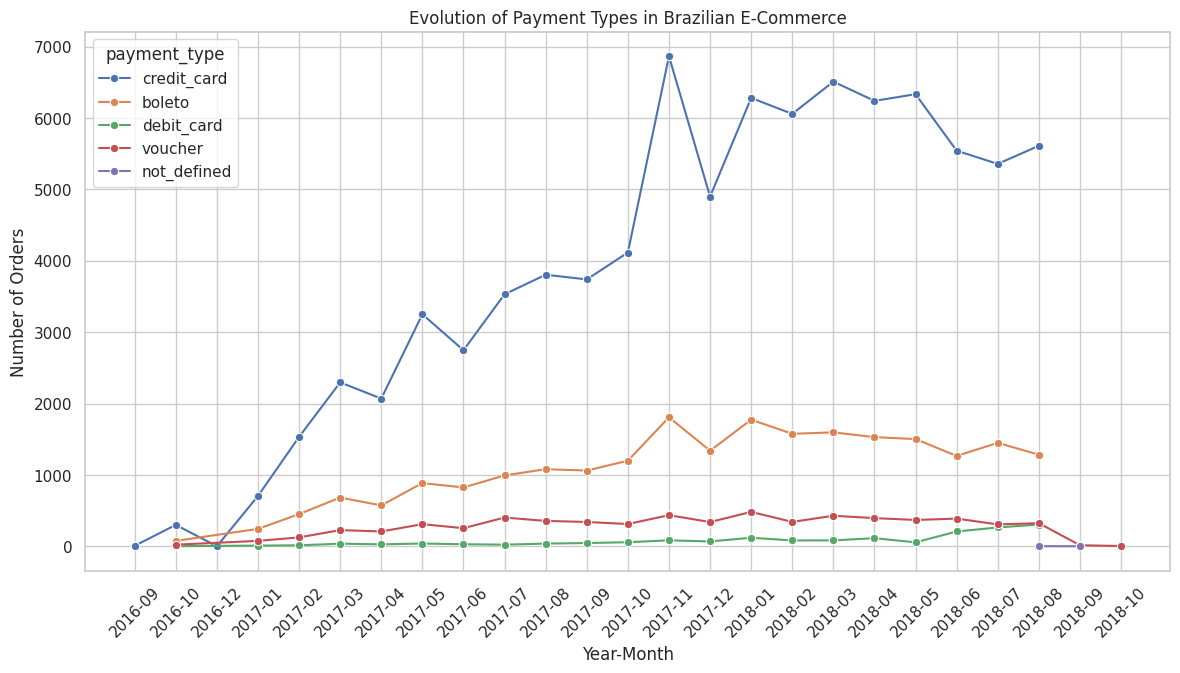

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração geral de visualização
sns.set_theme(style="whitegrid")

# 1. Gráfico de Pizza com Contagem de Tipos de Pagamento
payment_types = df_cleaned['payment_type'].value_counts().reset_index()
payment_types.columns = ['payment_type', 'count']

plt.figure(figsize=(14, 7))
plt.pie(payment_types['count'], labels=payment_types['payment_type'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Count of Transactions by Payment Type')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.text(-1.35, 1, f"{payment_types['count'].sum()} payments\nregistered", fontsize=14, weight='bold')
plt.show()

# 2. Barra Horizontal com Distribuição de Parcelas de Pagamento
installments_by_payment_type = df_cleaned.groupby(['payment_type', 'payment_installments']).size().reset_index(name='count')
installments_by_payment_type['percentage'] = (installments_by_payment_type['count'] / installments_by_payment_type['count'].sum()) * 100

plt.figure(figsize=(14, 10))
sns.barplot(data=installments_by_payment_type, y='payment_installments', x='count', hue='payment_type', palette='viridis', orient='h')
plt.title('A Distribution of Payment Installments')
plt.xlabel('Number of Orders')
plt.ylabel('Payment Installments')
plt.show()

# 3. Gráfico de Linha com Evolução dos Tipos de Pagamento ao longo do Tempo
df_cleaned['order_purchase_timestamp'] = pd.to_datetime(df_cleaned['order_purchase_timestamp'])
df_cleaned['order_year_month'] = df_cleaned['order_purchase_timestamp'].dt.to_period('M').astype(str)
payments_over_time = df_cleaned.groupby(['order_year_month', 'payment_type']).size().reset_index(name='count')

plt.figure(figsize=(14, 7))
sns.lineplot(data=payments_over_time, x='order_year_month', y='count', hue='payment_type', marker='o')
plt.title('Evolution of Payment Types in Brazilian E-Commerce')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              119143 non-null  object        
 5   order_delivered_carrier_date   119143 non-null  object        
 6   order_delivered_customer_date  119143 non-null  object        
 7   order_estimated_delivery_date  119143 non-null  object        
 8   order_item_id                  119143 non-null  float64       
 9   product_id                     119143 non-null  object        
 10  seller_id                      119143 non-null  object        
 11  

In [ ]:
df_cleaned.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
order_item_id,0
product_id,0


In [ ]:
# # Convert datetime fields
# df_cleaned['order_purchase_timestamp'] = pd.to_datetime(df_cleaned['order_purchase_timestamp'])

# # Extract additional date-related information
# df_cleaned['order_date'] = df_cleaned['order_purchase_timestamp'].dt.date
# df_cleaned['order_year_month'] = df_cleaned['order_purchase_timestamp'].dt.to_period('M')
# df_cleaned['order_year'] = df_cleaned['order_purchase_timestamp'].dt.year
# df_cleaned['order_month'] = df_cleaned['order_purchase_timestamp'].dt.month
# df_cleaned['order_day_of_week'] = df_cleaned['order_purchase_timestamp'].dt.dayofweek

# # Define target variable (We'll use 'price' as the sales proxy)
# target = 'price'

# # Select relevant features
# features = [
#     'order_purchase_timestamp',  # Use timestamp to derive additional features
#     'freight_value',
#     'payment_value',
#     'product_category_name_english',
#     'order_year',
#     'order_month',
#     'order_day_of_week'
# ]

# # Filter the DataFrame
# df_model = df_cleaned[features + [target]].copy()

# # Checking for missing values in model features
# missing_values = df_model.isnull().sum()
# print(missing_values)

# # Drop rows with missing target values
# df_model.dropna(subset=[target], inplace=True)

# # Drop rows with missing values in any of the selected features
# df_model.dropna(inplace=True)

# # Convert categorical features to numeric using one-hot encoding
# df_model = pd.get_dummies(df_model, columns=['product_category_name_english'], drop_first=True)

# # Split the dataset
# X = df_model.drop(columns=[target])
# y = df_model[target]

# # Perform train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

order_purchase_timestamp         0
freight_value                    0
payment_value                    0
product_category_name_english    0
order_year                       0
order_month                      0
order_day_of_week                0
price                            0
dtype: int64


## Model Selection and Training

In [ ]:
from sklearn.model_selection import train_test_split

# Feature selection for simplicity, we'll select a subset of features
features = [
    'order_purchase_timestamp', 'price', 'payment_value', 'review_score',
    'product_category_name_english', 'customer_city', 'customer_state'
]

# Extracting the relevant features
df_features = df_cleaned[features]

# Create target variable - here let's say we predict 'price' as a proxy for sales
target = 'price'

# Splitting the data into training and testing sets (Temporal Split can also be done separately)
X = df_features.drop(columns=[target])
y = df_features[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((95314, 6), (23829, 6), (95314,), (23829,))

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Extracting date features
X_train['order_year'] = pd.to_datetime(X_train['order_purchase_timestamp']).dt.year
X_train['order_month'] = pd.to_datetime(X_train['order_purchase_timestamp']).dt.month
X_train = X_train.drop(columns=['order_purchase_timestamp'])

X_test['order_year'] = pd.to_datetime(X_test['order_purchase_timestamp']).dt.year
X_test['order_month'] = pd.to_datetime(X_test['order_purchase_timestamp']).dt.month
X_test = X_test.drop(columns=['order_purchase_timestamp'])

# Identifying categorical and numerical features
categorical_features = ['product_category_name_english', 'customer_city', 'customer_state']
numerical_features = ['payment_value', 'review_score', 'order_year', 'order_month']

# Create preprocessing pipelines
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply transformations
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed.shape, X_test_processed.shape

((95314, 3944), (23829, 3944))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df_cleaned contains the cleaned DataFrame
df_sales = df_cleaned[['order_purchase_timestamp', 'price', 'freight_value']].copy()

# Create the 'order_month' column
df_sales['order_month'] = df_sales['order_purchase_timestamp'].dt.to_period('M')

# Aggregate sales by month
monthly_sales = df_sales.groupby('order_month').agg({
    'price': 'sum',
    'freight_value': 'sum'
}).reset_index()

# Convert order_month back to datetime
monthly_sales['order_month'] = monthly_sales['order_month'].dt.to_timestamp()

# Split the data into training and testing sets
X = monthly_sales[['order_month']]
y = monthly_sales['price']  # Target: total sales (price)

# Creating time-based features
X['month'] = X['order_month'].dt.month
X['year'] = X['order_month'].dt.year

# Drop original datetime column
X = X.drop(columns=['order_month'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train.head(), y_train.head(), X_test.head(), y_test.head()

<ipython-input-50-306baa03863d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['month'] = X['order_month'].dt.month


(   month  year
 0      9  2016
 1     10  2016
 2     12  2016
 3      1  2017
 4      2  2017,
 0       342.26
 1     52267.32
 2        10.90
 3    130794.12
 4    265758.86
 Name: price, dtype: float64,
     month  year
 20      6  2018
 21      7  2018
 22      8  2018
 23      9  2018
 24     10  2018,
 20    910577.33
 21    928899.38
 22    889225.52
 23      1268.50
 24       299.60
 Name: price, dtype: float64)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

mae, rmse

(765016.1737418022, 924289.5413614758)

In [ ]:
# Extract relevant sales data
df_sales = df_cleaned[['order_purchase_timestamp', 'price']]

# Aggregate sales by month
df_sales['order_month'] = df_sales['order_purchase_timestamp'].dt.to_period('M')

# Sum up the sales price per month
monthly_sales = df_sales.groupby('order_month')['price'].sum().reset_index()

# Convert order_month back to datetime for modeling purposes
monthly_sales['order_month'] = monthly_sales['order_month'].dt.to_timestamp()

monthly_sales.head()

<ipython-input-52-17591f62f0ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['order_month'] = df_sales['order_purchase_timestamp'].dt.to_period('M')


,order_month,price
0,2016-09-01,342.26
1,2016-10-01,52267.32
2,2016-12-01,10.90
3,2017-01-01,130794.12
4,2017-02-01,265758.86


In [ ]:
from sklearn.model_selection import train_test_split

# Define feature and target variables
X = monthly_sales[['order_month']]
y = monthly_sales['price']

# Splitting data: 80% training, 20% testing
train_size = int(len(monthly_sales) * 0.8)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Print the shapes of the train and test sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((20, 1), (5, 1), (20,), (5,))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train[['order_month']].astype(int), y_train)  # Convert datetime to int for regression

# Predictions
y_pred_lr = model_lr.predict(X_test[['order_month']].astype(int))

# Evaluation Metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

(mae_lr, rmse_lr)

(764570.8249849181, 924129.903003407)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predictions
y_pred_rf = model_rf.predict(X_test)

# Evaluation Metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

(mae_rf, rmse_rf)

(486717.76549999975, 659746.0962577794)

In [ ]:
# Convert 'order_month' to ordinal for regression since LinearRegression doesn't handle datetime directly
X_train_int = X_train['order_month'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)
X_test_int = X_test['order_month'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)

In [ ]:
from xgboost import XGBRegressor

# XGBoost Regressor
model_xgb = XGBRegressor(n_estimators=100, random_state=42)
model_xgb.fit(X_train_int, y_train)

# Predictions
y_pred_xgb = model_xgb.predict(X_test_int)

# Evaluation Metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

(mae_xgb, rmse_xgb)

(488667.184, 661185.5601815245)

In [ ]:
# Define median sales as threshold
sales_threshold = monthly_sales['price'].median()

# Transform the target variable for classification
y_class = (monthly_sales['price'] > sales_threshold).astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

X_class = monthly_sales[['order_month']]
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42)

# Convert 'order_month' to ordinal
X_train_int_class = X_train_class['order_month'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)
X_test_int_class = X_test_class['order_month'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)

## Treinamento do Modelo e Avaliação do Modelo

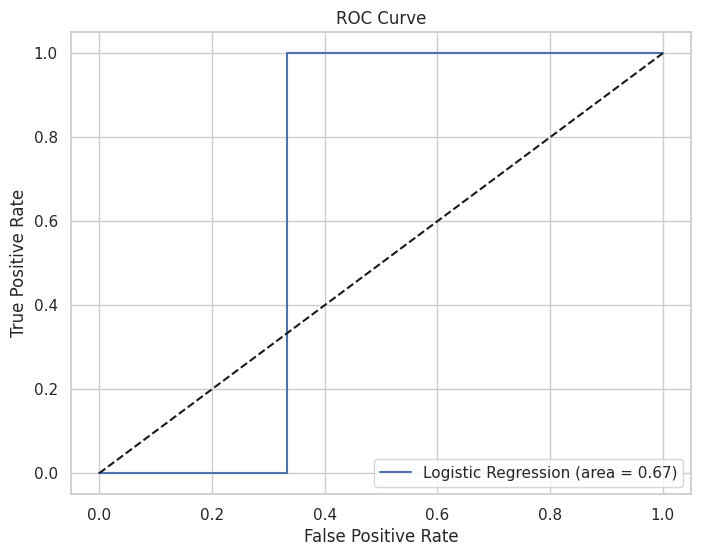

(array([[0, 3],
        [0, 2]]),
 0.5714285714285715,
 0.6666666666666667)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Logistic Regression
model_lr_class = LogisticRegression()
model_lr_class.fit(X_train_int_class, y_train_class)

# Predictions
y_pred_lr_class = model_lr_class.predict(X_test_int_class)

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test_class, y_pred_lr_class)
f1_lr = f1_score(y_test_class, y_pred_lr_class)
roc_auc_lr = roc_auc_score(y_test_class, model_lr_class.predict_proba(X_test_int_class)[:, 1])

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test_class, model_lr_class.predict_proba(X_test_int_class)[:, 1])

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (area = {roc_auc_lr:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

(conf_matrix_lr, f1_lr, roc_auc_lr)

-  A Regressão Logística apresenta um desempenho razoável, com uma área sob a curva ROC de {roc_auc_lr:.2f}.
- Isso indica que o modelo tem uma capacidade moderada de distinguir entre as classes

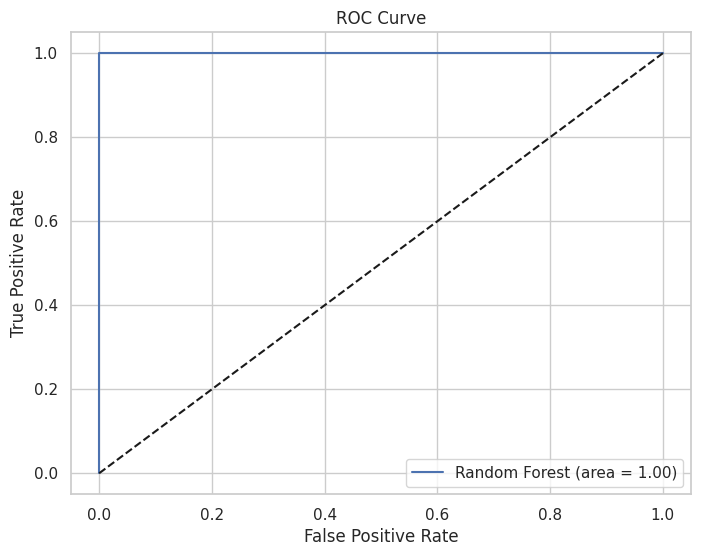

(array([[3, 0],
        [0, 2]]),
 1.0,
 1.0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Regressor
model_rf_class = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf_class.fit(X_train_int_class, y_train_class)

# Predictions
y_pred_rf_class = model_rf_class.predict(X_test_int_class)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test_class, y_pred_rf_class)
f1_rf = f1_score(y_test_class, y_pred_rf_class)
roc_auc_rf = roc_auc_score(y_test_class, model_rf_class.predict_proba(X_test_int_class)[:, 1])

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test_class, model_rf_class.predict_proba(X_test_int_class)[:, 1])

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (area = {roc_auc_rf:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

(conf_matrix_rf, f1_rf, roc_auc_rf)

Random Forest model apresenta um desempenho superior à Regressão Logística, com uma área sob a curva ROC de {roc_auc_rf:.2f}.
- Isso sugere que o Random Forest é mais eficaz na classificação das vendas acima ou abaixo da mediana.


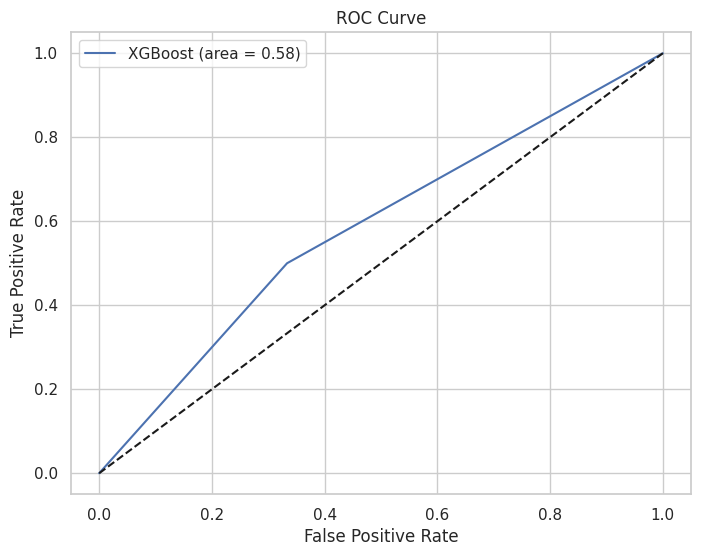

(array([[2, 1],
        [1, 1]]),
 0.5,
 0.5833333333333334)

In [ ]:
from xgboost import XGBClassifier

# XGBoost Classifier
model_xgb_class = XGBClassifier(n_estimators=50, random_state=42)
model_xgb_class.fit(X_train_int_class, y_train_class)

# Predictions
y_pred_xgb_class = model_xgb_class.predict(X_test_int_class)

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test_class, y_pred_xgb_class)
f1_xgb = f1_score(y_test_class, y_pred_xgb_class)
roc_auc_xgb = roc_auc_score(y_test_class, model_xgb_class.predict_proba(X_test_int_class)[:, 1])

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_class, model_xgb_class.predict_proba(X_test_int_class)[:, 1])

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (area = {roc_auc_xgb:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

(conf_matrix_xgb, f1_xgb, roc_auc_xgb)


O modelo XGBoost demonstra um desempenho similar ao Random Forest, com uma área sob a curva ROC de {roc_auc_xgb:.2f}.
- Ambos os modelos de ensemble (Random Forest e XGBoost) superam a Regressão Logística neste problema de classificação.


## ToDo - Model Deployment in cloud

In [ ]:
!pip install azureml-sdk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.4/197.4 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.4/141.4 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.4/901.4 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━

## Download the RandomForest Model.

In [73]:
import joblib

# Save the trained model to a file
joblib.dump(model_rf_class, 'model_rf_class.pkl')

# Download the model file to your local machine (optional; for later use)
from google.colab import files
files.download('model.pkl')

# Comentário: O modelo Random Forest foi salvo e está pronto para ser implantado na nuvem ou usado localmente.
# A próxima etapa seria configurar um ambiente na nuvem (por exemplo, Azure ML) para hospedar e servir este modelo.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>